# Network Anomaly Detection - EDA

 ## 1. Dataset Overview

## Dataset Structure

The UNSW-NB15 dataset includes:
- **Pre-split training set**: ~175,341 records for model training and EDA
- **Pre-split testing set**: ~82,332 records for final model evaluation
- **Features**: 49 features including flow characteristics, content features, and labels

**Using the training set for all exploratory data analysis.**
The testing set will be reserved for final model evaluation to avoid data leakage.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display Options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [19]:
# Read in data
df = pd.read_csv("~/ml-portfolio/network-anomaly-detection/data/raw/UNSW_NB15_training-set.csv") # Training set
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [5]:
# Basic info about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset shape: (175341, 45)
Number of rows: 175341
Number of columns: 45


In [6]:
# Column names
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']


The following feature descriptions are from the UNSW-NB15_features.csv file:

### Basic Flow Identifiers
1. **srcip** - Source IP address
2. **sport** - Source port number
3. **dstip** - Destination IP address
4. **dsport** - Destination port number
5. **proto** - Transaction protocol

### Connection State Features
6. **state** - Connection state (e.g., ACC, CLO, CON, FIN, INT, REQ, RST, etc.)
7. **dur** - Record total duration
8. **service** - Network service (http, ftp, smtp, ssh, dns, ftp-data, irc, or -)

### Byte & Packet Counts
9. **sbytes** - Source to destination transaction bytes
10. **dbytes** - Destination to source transaction bytes
11. **Spkts** - Source to destination packet count
12. **Dpkts** - Destination to source packet count

### Time-to-Live (TTL) Features
13. **sttl** - Source to destination time to live value
14. **dttl** - Destination to source time to live value

### Packet Loss Features
15. **sloss** - Source packets retransmitted or dropped
16. **dloss** - Destination packets retransmitted or dropped

### Load & Throughput Features
17. **Sload** - Source bits per second
18. **Dload** - Destination bits per second

### TCP Window Features
19. **swin** - Source TCP window advertisement value
20. **dwin** - Destination TCP window advertisement value

### TCP Sequence Features
21. **stcpb** - Source TCP base sequence number
22. **dtcpb** - Destination TCP base sequence number

### Packet Size Features
23. **smeansz** - Mean of flow packet size transmitted by source
24. **dmeansz** - Mean of flow packet size transmitted by destination

### HTTP Features
25. **trans_depth** - Pipelined depth of HTTP request/response transaction
26. **res_bdy_len** - Actual uncompressed content size from server's HTTP service

### Jitter Features (Network Delay Variation)
27. **Sjit** - Source jitter in milliseconds
28. **Djit** - Destination jitter in milliseconds

### Time Features
29. **Stime** - Record start time (timestamp)
30. **Ltime** - Record last time (timestamp)

### Interpacket Arrival Time
31. **Sintpkt** - Source interpacket arrival time (mSec)
32. **Dintpkt** - Destination interpacket arrival time (mSec)

### TCP Round-Trip Time Features
33. **tcprtt** - TCP connection setup round-trip time (sum of synack and ackdat)
34. **synack** - Time between SYN and SYN_ACK packets
35. **ackdat** - Time between SYN_ACK and ACK packets

### Connection Pattern Features
36. **is_sm_ips_ports** - Binary flag: 1 if source/dest IPs and ports are equal, else 0
37. **ct_state_ttl** - Count for each state according to TTL value ranges
38. **ct_flw_http_mthd** - Count of flows with HTTP methods (GET, POST)
39. **is_ftp_login** - Binary flag: 1 if FTP session accessed with user/password, else 0
40. **ct_ftp_cmd** - Count of flows with FTP commands

### Connection Count Features (Last 100 Connections)
41. **ct_srv_src** - Connections with same service and source address
42. **ct_srv_dst** - Connections with same service and destination address
43. **ct_dst_ltm** - Connections with same destination address
44. **ct_src_ltm** - Connections with same source address
45. **ct_src_dport_ltm** - Connections with same source address and destination port
46. **ct_dst_sport_ltm** - Connections with same destination address and source port
47. **ct_dst_src_ltm** - Connections with same source and destination address

### Label Features
48. **attack_cat** - Attack category name (Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode, Worms, or Normal)
49. **Label** - Binary label: 0 for normal, 1 for attack

---

**Source:** UNSW-NB15_features.csv

In [13]:
# Missing Value Check
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percentage': missing_pct.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(f"Columns with missing values: {len(missing_df)}")
    print(missing_df.to_string(index=False))
else:
    print("✓ No missing values found!")

No missing values found!


In [20]:
# Duplicates Check
dup_count = df.duplicated().sum()
dup_pct = (dup_count / len(df)) * 100

print(f"Duplicate rows: {dup_count:,} ({dup_pct:.2f}%)")

if dup_count > 0:
    print("Duplicates detected")
    print("\nFirst few duplicate examples:")
    print(df[df.duplicated(keep=False)].head())
else:
    print("No duplicate rows!")

Duplicate rows: 0 (0.00%)
No duplicate rows!


In [21]:
# Data Types
print("\nColumns by data type:")
print(f"Numeric columns: {len(numeric_cols)}")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {len(categorical_cols)}")

print(f"\nCategorical columns:")
print(list(categorical_cols))

print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Columns by data type:
Numeric columns: 41
Categorical columns: 4

Categorical columns:
['proto', 'service', 'state', 'attack_cat']

Memory usage: 95.56 MB


In [22]:
# Binary Label Analysis
binary_dist = df['label'].value_counts().sort_index()
print("\nValue counts:")
print(binary_dist)

print("\nPercentage distribution:")
binary_pct = df['label'].value_counts(normalize=True).sort_index() * 100
for label, pct in binary_pct.items():
    label_name = "Normal" if label == 0 else "Attack"
    print(f"  {label} ({label_name}): {pct:.2f}%")


Value counts:
label
0     56000
1    119341
Name: count, dtype: int64

Percentage distribution:
  0 (Normal): 31.94%
  1 (Attack): 68.06%


### **Note: Label class imbalance.

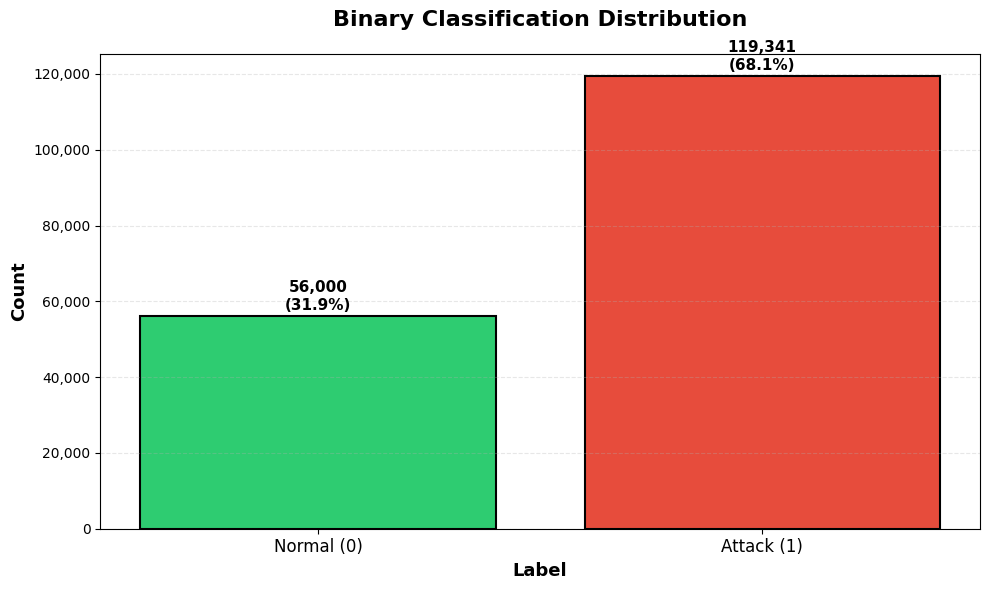

In [32]:
# Visualize binary distribution
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot
colors = ['#2ecc71', '#e74c3c']  # Green for normal, red for attack
bars = ax.bar(binary_dist.index, binary_dist.values, color=colors, edgecolor='black', linewidth=1.5)

# Formatting
ax.set_title('Binary Classification Distribution', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Label', fontsize=13, fontweight='bold')
ax.set_ylabel('Count', fontsize=13, fontweight='bold')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Normal (0)', 'Attack (1)'], fontsize=12)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Count and percentage labels on bars
for i, (idx, val) in enumerate(binary_dist.items()):
    percentage = (val/len(df)*100)
    ax.text(i, val + 1000, f'{val:,}\n({percentage:.1f}%)', 
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Y-axis formatting
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

In [33]:
# Multi-class Analysis
multiclass_dist = df['attack_cat'].value_counts()
print("\nValue counts:")
print(multiclass_dist)

print("\nPercentage distribution:")
multiclass_pct = df['attack_cat'].value_counts(normalize=True) * 100
print(multiclass_pct)


Value counts:
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

Percentage distribution:
attack_cat
Normal            31.937767
Generic           22.812691
Exploits          19.044605
Fuzzers           10.370649
DoS                6.994371
Reconnaissance     5.983198
Analysis           1.140635
Backdoor           0.995774
Shellcode          0.646169
Worms              0.074141
Name: proportion, dtype: float64


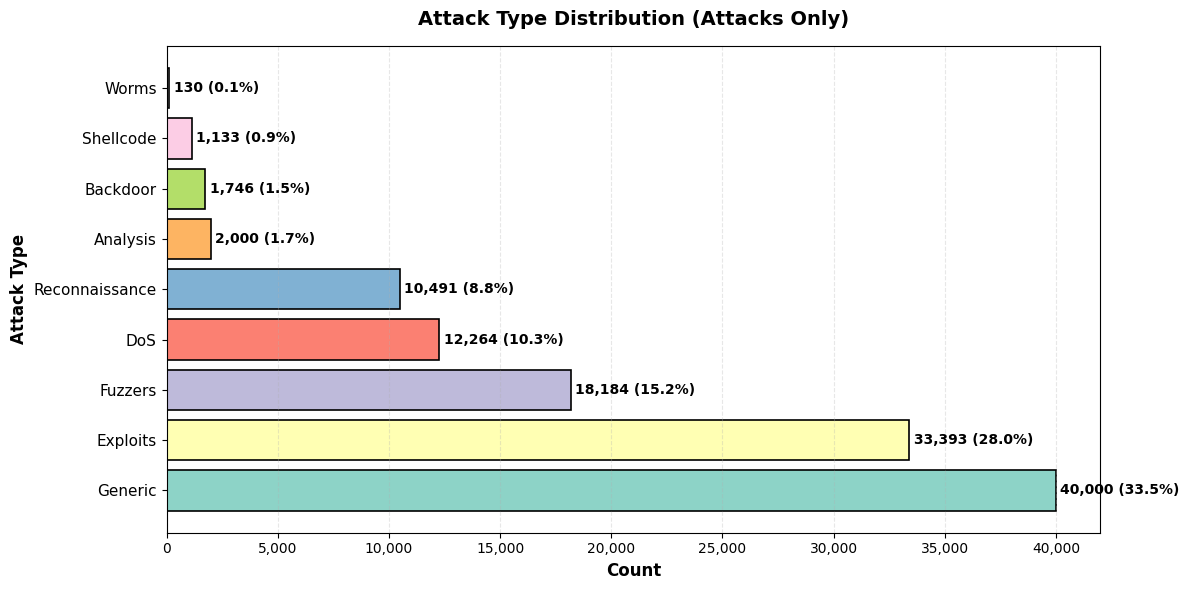

In [36]:
# Visualize attack types (excluding Normal)
attack_only = df[df['label'] == 1]['attack_cat'].value_counts()

fig, ax = plt.subplots(figsize=(12, 6))

# Different colors for each attack
colors_attack = plt.cm.Set3(range(len(attack_only)))

bars = ax.barh(range(len(attack_only)), attack_only.values, 
               color=colors_attack, edgecolor='black', linewidth=1.2)
ax.set_yticks(range(len(attack_only)))
ax.set_yticklabels(attack_only.index, fontsize=11)
ax.set_title('Attack Type Distribution (Attacks Only)', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Count', fontsize=12, fontweight='bold')
ax.set_ylabel('Attack Type', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Count labels for attacks
total_attacks = attack_only.sum()
for i, (idx, val) in enumerate(attack_only.items()):
    percentage = (val/total_attacks*100)
    ax.text(val + 200, i, f'{val:,} ({percentage:.1f}%)', 
            va='center', fontsize=10, fontweight='bold')

# Format x-axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

In [44]:
# Attack Category Analysis
attack_categories = df[df['label'] == 1]['attack_cat'].value_counts()
max_attack = attack_categories.max()
min_attack = attack_categories.min()
imbalance_severity = max_attack / min_attack
# Calculate counts for summary
normal_count = (df['label'] == 0).sum()
attack_count = (df['label'] == 1).sum()
imbalance_ratio = attack_count / normal_count


print(f"Most common attack: {attack_categories.index[0]} ({max_attack:,} samples)")
print(f"Least common attack: {attack_categories.index[-1]} ({min_attack:,} samples)")
print(f"Imbalance ratio (max:min): {imbalance_severity:.2f}")

Most common attack: Generic (40,000 samples)
Least common attack: Worms (130 samples)
Imbalance ratio (max:min): 307.69


### **Note: Severe class imbalance. May need class weighting.

## Summary Statistics

In [45]:
# Summary Statistics
print("=" * 70)
print("INITIAL EDA SUMMARY")
print("=" * 70)

print("\nDATASET OVERVIEW")
print("-" * 70)
print(f"Total records: {len(df):,}")
print(f"Total features: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Numeric features: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"Categorical features: {len(df.select_dtypes(include=['object']).columns)}")

print("\nTARGET VARIABLE DISTRIBUTION")
print("-" * 70)
print(f"Binary classes: {df['label'].nunique()}")
print(f"  Normal traffic: {normal_count:,} ({normal_count/len(df)*100:.1f}%)")
print(f"  Attack traffic: {attack_count:,} ({attack_count/len(df)*100:.1f}%)")
print(f"  Imbalance ratio: {imbalance_ratio:.4f} (attack:normal)")
print(f"\nAttack categories: {df['attack_cat'].nunique()}")
attack_types = df[df['label'] == 1]['attack_cat'].value_counts()
for attack_type, count in attack_types.items():
    pct = (count / attack_count) * 100
    print(f"  {attack_type}: {count:,} ({pct:.1f}% of attacks)")

print("\nDATA QUALITY")
print("-" * 70)
missing_total = df.isnull().sum().sum()
dup_total = df.duplicated().sum()
print(f"Missing values: {missing_total:,}")
print(f"Duplicate rows: {dup_total:,}")
inf_total = df[df.select_dtypes(include=[np.number]).columns].isin([np.inf, -np.inf]).sum().sum()
print(f"Infinite values: {inf_total}")

print("\nKEY OBSERVATIONS")
print("-" * 70)
print(f"1. Dataset has moderate class imbalance (68% attack, 32% normal)")
print(f"2. Most common attack type: {attack_types.index[0]} ({attack_types.iloc[0]:,} samples)")
print(f"3. Least common attack type: {attack_types.index[-1]} ({attack_types.iloc[-1]:,} samples)")
print(f"4. Data quality is good - no missing values or duplicates")

print("\nNEXT STEPS")
print("-" * 70)
print("1. Feature analysis and correlation study")
print("2. Address class imbalance (SMOTE or class weights)")
print("3. Encode categorical variables")
print("4. Feature scaling/normalization")
print("5. Baseline model development")

print("\n" + "=" * 70)
print(f"EDA completed: {pd.Timestamp.now().strftime('%Y-%m-%d')}")
print("=" * 70)

INITIAL EDA SUMMARY

DATASET OVERVIEW
----------------------------------------------------------------------
Total records: 175,341
Total features: 45
Memory usage: 95.56 MB
Numeric features: 41
Categorical features: 4

TARGET VARIABLE DISTRIBUTION
----------------------------------------------------------------------
Binary classes: 2
  Normal traffic: 56,000 (31.9%)
  Attack traffic: 119,341 (68.1%)
  Imbalance ratio: 2.1311 (attack:normal)

Attack categories: 10
  Generic: 40,000 (33.5% of attacks)
  Exploits: 33,393 (28.0% of attacks)
  Fuzzers: 18,184 (15.2% of attacks)
  DoS: 12,264 (10.3% of attacks)
  Reconnaissance: 10,491 (8.8% of attacks)
  Analysis: 2,000 (1.7% of attacks)
  Backdoor: 1,746 (1.5% of attacks)
  Shellcode: 1,133 (0.9% of attacks)
  Worms: 130 (0.1% of attacks)

DATA QUALITY
----------------------------------------------------------------------
Missing values: 0
Duplicate rows: 0
Infinite values: 0

KEY OBSERVATIONS
--------------------------------------------